In [ ]:
import pandas as pd 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r'C:\Users\DELL-LAP\Downloads\Community-Participation-DataSet(3).csv')
ds = pd.DataFrame(data)
ds  

In [ ]:
print(ds['Record#'].value_counts())
print(ds['Record#'].mode())
print(ds['Elapsed_Time'].value_counts())
print(ds['Elapsed_Time'].mode())
print(ds['Elapsed_Time'].max()-ds['Elapsed_Time'].min())
print(ds['Time_in_Community'].value_counts())
print(ds['Time_in_Community'].mode())
print(ds['Gender'].value_counts())
print(ds['Gender'].mode())
print(ds['Working'].value_counts())
print(ds['Working'].mode())
print(ds['Age'].value_counts())
print(ds['Age'].mode())
print(ds['Age'].max()-ds['Age'].min())
print(ds['Family'].value_counts())
print(ds['Family'].mode())
print(ds['Hobbies'].value_counts())
print(ds['Hobbies'].mode())
print(ds['Social_Club'].value_counts())
print(ds['Social_Club'].mode())
print(ds['Political'].value_counts())
print(ds['Political'].mode())
print(ds['Professional'].value_counts())
print(ds['Professional'].mode())
print(ds['Religious'].value_counts())
print(ds['Religious'].mode())
print(ds['Support_Group'].value_counts())
print(ds['Support_Group'].mode())

In [ ]:
print(ds['Age'].mean())
print(ds['Elapsed_Time'].mean())


<AxesSubplot:ylabel='Density'>

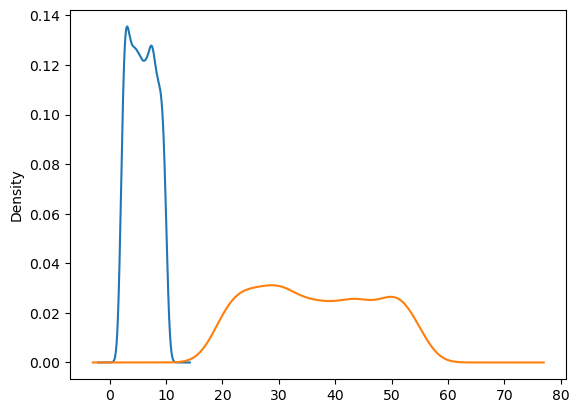

In [198]:
ds['Elapsed_Time'].plot.kde()
ds['Age'].plot.kde()

In [ ]:
print(ds['Age'].median())
print(ds['Elapsed_Time'].median())

In [ ]:
print(ds['Age'].var())
print(ds['Elapsed_Time'].var())

In [ ]:
print(ds['Age'].std())
print(ds['Elapsed_Time'].std())

In [123]:
x=(25*ds['Age'].count())/100
s=sorted(ds['Age'])
print()
q1=s[int(x)-1]
q1
x=(75*ds['Age'].count())/100
s=sorted(ds['Age'])
q3=s[int(x)-1]
q3

46

max of the original data =  57
min of the original data =  17
**********************************
max in five number summary =  74.5
min in five number summary =  -1.5
[]
the number of outlier =  0


Text(0.5, 1.0, '(no outlier)')

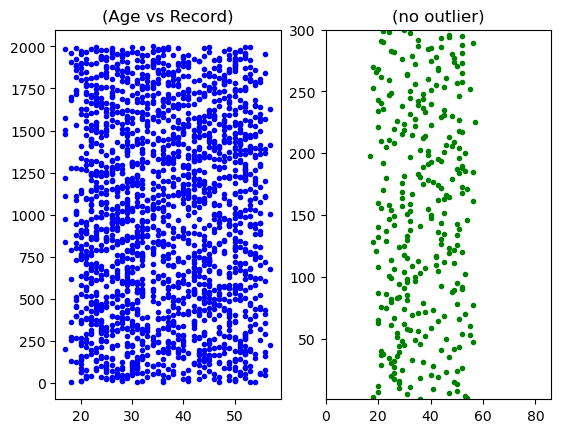

In [124]:
print("max of the original data = ",ds['Age'].max())
print("min of the original data = ",ds['Age'].min())
print("*"*34)
iqr=q3-q1
maxx=q3+iqr*1.5
minn=q1-iqr*1.5
outlier=[]
for i in ds['Age']:
    if i>maxx or i<minn:
        outlier.append(i)
print("max in five number summary = ",maxx) 
print("min in five number summary = ",minn)
print(outlier)
print("the number of outlier = ",len(outlier))
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.scatter(ds['Age'],ds['Record#'],color="blue" ,marker='.')
ax1.xlable="Age"
ax1.ylable="Record"
ax1.set_title('(Age vs Record)')
ax2.scatter(ds["Age"],ds["Record#"],color="green" ,marker='.')
ax2.xlable="Age"
ax2.set_xlim([0,86])
ax2.set_ylim([1,300])
ax2.ylable="outlier"
ax2.set_title('(no outlier)')

In [126]:
x=(25*ds['Elapsed_Time'].count())/100
s=sorted(ds['Elapsed_Time'])
Q1=s[int(x)-1]
Q1
x=(75*ds['Elapsed_Time'].count())/100
s=sorted(ds['Elapsed_Time'])
Q3=s[int(x)-1]
Q3

7.82

In [ ]:
print("max of the original data = ",ds['Elapsed_Time'].max())
print("min of the original data = ",ds['Elapsed_Time'].min())
print("*"*34)
iqr=Q3-Q1
maxx=Q3+iqr*1.5
minn=Q1-iqr*1.5
outlier=[]
for i in ds['Elapsed_Time']:
    if i>maxx or i<minn:
        outlier.append(i)
print("max in five number summary = ",maxx) 
print("min in five number summary = ",minn)
print(outlier)
print("the number of outlier = ",len(outlier))
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.scatter(ds['Elapsed_Time'],ds['Record#'],color="blue" ,marker='.')
ax1.set_xlabel("Elapsed_Time")
ax1.set_ylabel("Record")
ax1.set_title('(Elapsed_Time vs Record)')


In [ ]:
fig2=plt.figure()
ax2=fig2.add_subplot(1,1,1)
ax2.scatter(ds["Elapsed_Time"],ds['Record#'],color="red" ,marker='.')
ax2.set_xlabel("Elapsed_Time")
ax2.set_ylabel('outlier')
ax2.set_xlim([0,12])
ax2.set_ylim([1,2000])
ax2.set_title('(no outlier)')

In [219]:
import csv
with open ('DM B.csv','w',newline="") as b:
    writer=csv.writer(b)
    writer.writerow(["minmax",'z_score','Age','discretise','Gender',"binary",'equi-width-bin1','equi-width-bin2','equi-width-bin3','equi-depth-bin1','equi-depth-bin2','equi-depth-bin3'])
    edb1=[]
    edb2=[]
    edb3=[]
    count=1
    for no in sorted(ds['Age']):
        if count <= 667:
            edb1.append(no)
            count+=1
        elif count>667 and count<=667+667:
            edb2.append(no)
            count+=1
        else:
            edb3.append(no)
            count+=1   
    ewb1=[] 
    ewb2=[] 
    ewb3=[]
    ran= (ds['Age'].max()-ds['Age'].min())/3
    count1=ds['Age'].min()+int(ran)-1
    count2=count1+ran-1
    count3=count2+ran
    for no in sorted(ds['Age']):
        if no <=count1:
            ewb1.append(no)
        elif no >count1 and no <=count2:
            ewb2.append(no)
        else:
            ewb3.append(no)
    countteen=0
    countyong=0
    countmid=0
    countmat=0
    countold=0
    for no , g ,w1,w2,w3,b1,b2,b3 in zip(ds['Age'],ds['Gender'],ewb1,ewb2,ewb3,edb1,edb2,edb3):
        minmax= ((no-ds['Age'].min())/(ds['Age'].max()-ds['Age'].min()))
        zscor= (no-ds['Age'].mean())/ds['Age'].std()
        if no>=1 and no<17:
            agedsc="teenager"
            countteen+=1
        elif no>=17 and no<=35:
            agedsc="young"
            countyong+=1
        elif no>=36 and no<=55:
            agedsc="mid_age"
            countmid+=1
        elif no>=56 and no<=70:
            agedsc="mature"
            countmat+=1
        elif no >=71:
            agedsc="old"
            countold+=1
        if g == "F":
           by=1
        else:
           by=0
        writer.writerow([f"{minmax:.3f}",f"{zscor:.3f}",no,agedsc,g,by,w1,w2,w3,b1,b2,b3])
    print("equi-width-bin1",len(ewb1),"values")
    print("equi-width-bin2",len(ewb2),"values")
    print("equi-width-bin3",len(ewb3),"values")
    print("equi-depth-bin1",len(edb1),"values")
    print("equi-depth-bin2",len(edb2),"values")
    print("equi-depth-bin3",len(edb3),"values")
    print("the number of people are teenagers in the data = ",countteen)
    print("the number of people are youngs in the data = ",countyong)
    print("the number of people are mid_age in the data = ",countmid)
    print("the number of people are mature in the data = ",countmat)
    print("the number of people are old in the data = ",countold)

equi-width-bin1 644 values
equi-width-bin2 628 values
equi-width-bin3 728 values
equi-depth-bin1 667 values
equi-depth-bin2 667 values
equi-depth-bin3 666 values
the number of people are teenagers in the data =  0
the number of people are youngs in the data =  308
the number of people are mid_age in the data =  310
the number of people are mature in the data =  10
the number of people are old in the data =  0


Text(0.5, 1.0, 'Gender')

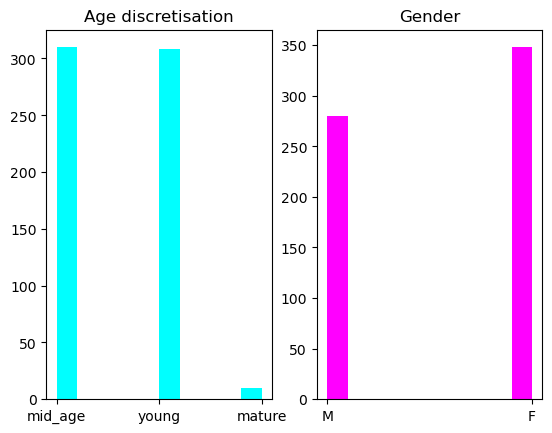

In [197]:

df3=pd.read_csv(r'C:\Users\DELL-LAP\OneDrive\سطح المكتب\DM B.csv')
df3=pd.DataFrame(df3)
df3.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.hist(df3['discretise'],color="cyan")
ax1.set_title('Age discretisation')
ax2.hist(df3['Gender'],color="magenta")
ax2.set_title('Gender')

In [86]:

from mlxtend.frequent_patterns import apriori,association_rules

In [91]:
data = pd.read_csv(r'C:\Users\DELL-LAP\Downloads\Community-Participation-DataSet(3).csv')
df = pd.DataFrame(data)
df.head()

,Record#,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
0,1,8.17,Medium,M,Yes,36,Yes,No,Yes,No,No,No,No
1,2,2.80,Medium,F,Yes,54,Yes,No,No,No,No,Yes,No
2,3,8.68,Medium,F,No,18,Yes,No,No,No,No,No,No
3,4,2.27,Medium,F,No,53,Yes,No,No,No,Yes,No,No
4,5,8.89,Short,F,Yes,31,No,No,No,No,No,No,No


In [ ]:
dataf=pd.get_dummies(df,drop_first=True)
dataf=dataf.drop("Record#",axis=1)
dataf=dataf.drop('Elapsed_Time',axis=1)
dataf=dataf.drop('Age',axis=1)
dataf.head()

In [117]:
frequent_itensets= apriori(dataf,min_support=0.07,use_colnames=True)
frequent_itensets.head(10)

c:\Users\DELL-LAP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.3790,(Time_in_Community_Medium)
1,0.2015,(Time_in_Community_Short)
2,0.4815,(Gender_M)
3,0.5015,(Working_Yes)
4,0.4015,(Family_Yes)
5,0.3015,(Hobbies_Yes)
6,0.1860,(Social_Club_Yes)
7,0.1015,(Political_Yes)
8,0.3295,(Professional_Yes)
9,0.4215,(Religious_Yes)


In [120]:
AssociationRules=association_rules(frequent_itensets,metric="confidence", min_threshold=0.5)
AssociationRules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Time_in_Community_Medium),(Gender_M),0.3790,0.4815,0.1960,0.517150,1.074040,0.013512,1.073833,0.111008
1,(Gender_M),(Working_Yes),0.4815,0.5015,0.2465,0.511942,1.020821,0.005028,1.021395,0.039338
2,(Family_Yes),(Working_Yes),0.4015,0.5015,0.2030,0.505604,1.008183,0.001648,1.008301,0.013562
3,(Hobbies_Yes),(Working_Yes),0.3015,0.5015,0.1530,0.507463,1.011890,0.001798,1.012106,0.016822
4,(Social_Club_Yes),(Working_Yes),0.1860,0.5015,0.0950,0.510753,1.018450,0.001721,1.018912,0.022255
5,(Professional_Yes),(Working_Yes),0.3295,0.5015,0.1655,0.502276,1.001548,0.000256,1.001559,0.002305
6,(Hobbies_Yes),(Family_Yes),0.3015,0.4015,0.1885,0.625207,1.557179,0.067448,1.596883,0.512259
7,(Social_Club_Yes),(Family_Yes),0.1860,0.4015,0.1240,0.666667,1.660440,0.049321,1.795500,0.488636
8,(Family_Yes),(Religious_Yes),0.4015,0.4215,0.2290,0.570361,1.353170,0.059768,1.346480,0.436081
9,(Religious_Yes),(Family_Yes),0.4215,0.4015,0.2290,0.543298,1.353170,0.059768,1.310482,0.451157


In [121]:
AssociationRules.sort_values(by='lift',ascending=True,inplace=True)
Rules=AssociationRules[["antecedents",'consequents','support','confidence','lift']]
finalrules=pd.DataFrame(Rules)
finalrules.sort_index(inplace=True)
finalrules.head(10)

,antecedents,consequents,support,confidence,lift
0,(Time_in_Community_Medium),(Gender_M),0.1960,0.517150,1.074040
1,(Gender_M),(Working_Yes),0.2465,0.511942,1.020821
2,(Family_Yes),(Working_Yes),0.2030,0.505604,1.008183
3,(Hobbies_Yes),(Working_Yes),0.1530,0.507463,1.011890
4,(Social_Club_Yes),(Working_Yes),0.0950,0.510753,1.018450
5,(Professional_Yes),(Working_Yes),0.1655,0.502276,1.001548
6,(Hobbies_Yes),(Family_Yes),0.1885,0.625207,1.557179
7,(Social_Club_Yes),(Family_Yes),0.1240,0.666667,1.660440
8,(Family_Yes),(Religious_Yes),0.2290,0.570361,1.353170
9,(Religious_Yes),(Family_Yes),0.2290,0.543298,1.353170


Text(0.5, 1.0, 'confidence')

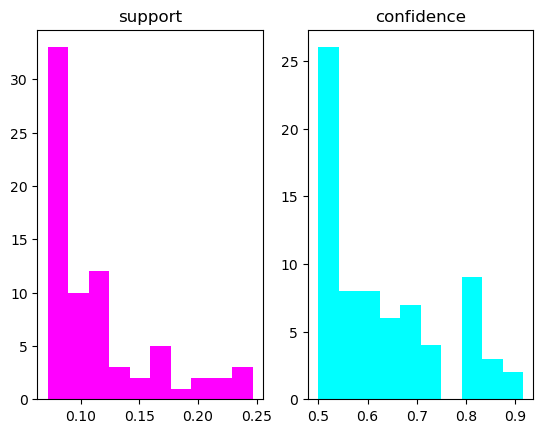

In [217]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.hist(finalrules['support'],color="magenta")
ax1.set_title("support")
ax2.hist(finalrules['confidence'],color="cyan")
ax2.set_title("confidence")